In [1]:
import pprint
import datetime
from typing import List

log_metadata = {
    "data/MIT_CSAIL/csail-newcarmen.log": {
        "lines_to_skip": 25
    }
}

# Add to the log_metadata the number of lines in each file
for log_path in log_metadata:
    with open(log_path) as log_file:
        log_metadata[log_path]["num_lines"] = sum(1 for line in log_file)

log_path = "data/MIT_CSAIL/csail-newcarmen.log"
print("Log Path:", log_path)
log_metadata = log_metadata[log_path]
print("Log Metadata:")
pprint.pprint(log_metadata)

class CarmenLaserMeasurement:
    KEYS = ["RAWLASER1", "RAWLASER2", "RAWLASER3", "RAWLASER4"]
    def __init__(self, words):
        self.key = words[0]
        self.type: int = int(words[1])
        self.start_angle: float = float(words[2])
        self.field_of_view: float = float(words[3])
        self.angular_resolution: float = float(words[4])
        self.max_range: float = float(words[5])
        self.accuracy: float = float(words[6])
        self.remission_mode: int = int(words[7])
        num_ranges = int(words[8])
        last_range = num_ranges + 8
        self.ranges: List[float] = []
        for word in words[9:last_range+1]:
            self.ranges.append(float(word))
        num_remissions = int(words[last_range+1])
        last_remission = last_range + 1 + num_remissions
        self.remissions: List[float] = []
        for word in words[last_range+1:last_remission]:
            print(last_range+1, last_remission+1)
            self.remissions.append(float(word))
        self.ipc_timestamp: float = float(words[last_remission+1])
        self.ipc_hostname: str = words[last_remission+2]
        self.logger_timestamp: float = float(words[last_remission+3])
        # A sanity check I used...
        # if words[last_remission+1] != str(float(words[last_remission+1])):
        #     print(words[last_remission+1], "!=", str(float(words[last_remission+1])))
        #     raise Exception("IPC timestamp cast to float failed")
        # if words[last_remission+3] != str(float(words[last_remission+3])):
        #     print(words[last_remission+3], "!=", str(float(words[last_remission+3])))
        #     raise Exception("Logger timestamp cast to float failed")
    def __str__(self):
        return "Carmen Laser Measurement:\n" \
             + "\tType: " + str(self.type) + "\n" \
             + "\tStart Angle: " + str(self.start_angle) + "\n" \
             + "\tFOV: " + str(self.field_of_view) + "\n" \
             + "\tAngle Res: " + str(self.angular_resolution) + "\n" \
             + "\tMax Range: " + str(self.max_range) + "\n" \
             + "\tAccuracy: " + str(self.accuracy) + "\n" \
             + "\tNum Ranges: " + str(len(self.ranges)) + "\n" \
             + "\tRanges: [" + str(self.ranges[:5])[1:-1] + ", ..., " \
                             + str(self.ranges[-5:])[1:-1] + "]\n" \
             + "\tRemission Mode: " + str(self.remission_mode) + "\n" \
             + "\tRemissions: " + str(self.remissions) + "\n" \
             + "\tIPC Timestamp: " + str(self.ipc_timestamp) + "\n" \
             + "\tIPC Hostname: " + str(self.ipc_hostname) + "\n" \
             + "\tLogger Timestamp: " + str(self.logger_timestamp) + "\n"

class CarmenFRLaserMeasurement:
    KEYS = ["FLASER", "RLASER"]
    def __init__(self, words):
        self.key = words[0]
        self.type: str = ""
        if words[0] == "FLASER":
            self.type = "F"
        elif words[0] == "RLASER":
            self.type = "R"
        num_ranges = int(words[1])
        last_range = num_ranges + 1
        self.ranges: List[float] = []
        for word in words[2:last_range+1]:
            self.ranges.append(float(word))
        self.x = float(words[last_range+1])
        self.y = float(words[last_range+2])
        self.theta = float(words[last_range+3])
        self.odom_x = float(words[last_range+4])
        self.odom_y = float(words[last_range+5])
        self.odom_theta = float(words[last_range+6])
        self.ipc_timestamp: float = float(words[last_range+7])
        self.ipc_hostname: str = words[last_range+8]
        self.logger_timestamp: float = float(words[last_range+9])
    def __str__(self):
        return "Carmen FR Laser Measurement:\n" \
             + "\tType: " + self.type + "\n" \
             + "\tNum Ranges: " + str(len(self.ranges)) + "\n" \
             + "\tRanges: [" + str(self.ranges[:5])[1:-1] + ", ..., " \
                             + str(self.ranges[-5:])[1:-1] + "]\n" \
             + "\tX: " + str(self.x) + "\n" \
             + "\tY: " + str(self.y) + "\n" \
             + "\tTheta: " + str(self.theta) + "\n" \
             + "\tOdom X: " + str(self.odom_x) + "\n" \
             + "\tOdom Y: " + str(self.odom_y) + "\n" \
             + "\tOdom Theta: " + str(self.odom_theta) + "\n" \
             + "\tIPC Timestamp: " + str(self.ipc_timestamp) + "\n" \
             + "\tIPC Hostname: " + str(self.ipc_hostname) + "\n" \
             + "\tLogger Timestamp: " + str(self.logger_timestamp) + "\n"

class CarmenRobotLaserMeasurement:
    KEYS = ["ROBOTLASER0", "ROBOTLASER1"]
    def __init__(self, words):
        self.key = words[0]
        self.type: int = int(words[1])
        self.start_angle: float = float(words[2])
        self.field_of_view: float = float(words[3])
        self.angular_resolution: float = float(words[4])
        self.max_range: float = float(words[5])
        self.accuracy: float = float(words[6])
        self.remission_mode: int = int(words[7])
        num_ranges = int(words[8])
        last_range = num_ranges + 8
        self.ranges: List[float] = []
#         for word in words[9:last_range+1]:
#             self.ranges.append(float(word))
#         self.laser_pose_x: float = float(words[last_range+1])
#         self.laser_pose_y: float = float(words[last_range+2])
#         self.laser_pose_theta: float = float(words[last_range+3])
#         self.robot_pose_x: float = float(words[last_range+4])
#         self.robot_pose_y: float = float(words[last_range+5])
#         self.robot_pose_theta: float = float(words[last_range+6])
#         self.laser_tv: float = float(words[last_range+7])
#         self.laser_rv: float = float(words[last_range+8])
#         self.forward_safety_dist: float = float(words[last_range+9])
#         self.side_safety_dist: List[float] = [float(word) for word in words[last_range+10:last_range+13]]
#         self.ipc_timestamp: float = float(words[last_range+13])
#         self.ipc_hostname: str = words[last_range+14]
#         self.logger_timestamp: float = float(words[last_range+15])
        for word in words[9:last_range+2]:
            self.ranges.append(float(word))
        self.laser_pose_x: float = float(words[last_range+2])
        self.laser_pose_y: float = float(words[last_range+3])
        self.laser_pose_theta: float = float(words[last_range+4])
        self.robot_pose_x: float = float(words[last_range+5])
        self.robot_pose_y: float = float(words[last_range+6])
        self.robot_pose_theta: float = float(words[last_range+7])
        self.laser_tv: float = float(words[last_range+8])
        self.laser_rv: float = float(words[last_range+9])
        self.forward_safety_dist: float = float(words[last_range+10])
        self.side_safety_dist: List[float] = [float(word) for word in words[last_range+11:last_range+13]]
        self.ipc_timestamp: float = float(words[last_range+13])
        self.ipc_hostname: str = words[last_range+14]
        self.logger_timestamp: float = float(words[last_range+15])
    def __str__(self):
        return "Carmen Robot Laser Measurement:\n" \
             + "\tType: " + str(self.type) + "\n" \
             + "\tStart Angle: " + str(self.start_angle) + "\n" \
             + "\tFOV: " + str(self.field_of_view) + "\n" \
             + "\tAngle Res: " + str(self.angular_resolution) + "\n" \
             + "\tMax Range: " + str(self.max_range) + "\n" \
             + "\tAccuracy: " + str(self.accuracy) + "\n" \
             + "\tRemission Mode: " + str(self.remission_mode) + "\n" \
             + "\tNum Ranges: " + str(len(self.ranges)) + "\n" \
             + "\tRanges: [" + str(self.ranges[:5])[1:-1] + ", ..., " \
                             + str(self.ranges[-5:])[1:-1] + "]\n" \
             + "\tLaser Pose X: " + str(self.laser_pose_x) + "\n" \
             + "\tLaser Pose Y: " + str(self.laser_pose_y) + "\n" \
             + "\tLaser Pose Theta: " + str(self.laser_pose_theta) + "\n" \
             + "\tRobot Pose X: " + str(self.robot_pose_x) + "\n" \
             + "\tRobot Pose Y: " + str(self.robot_pose_y) + "\n" \
             + "\tRobot Pose Theta: " + str(self.robot_pose_theta) + "\n" \
             + "\tLaser TV: " + str(self.laser_tv) + "\n" \
             + "\tLaser RV: " + str(self.laser_rv) + "\n" \
             + "\tForward Safety Dist: " + str(self.forward_safety_dist) + "\n" \
             + "\tSide Safety Dist: " + str(self.side_safety_dist) + "\n" \
             + "\tIPC Timestamp: " + str(self.ipc_timestamp) + "\n" \
             + "\tIPC Hostname: " + str(self.ipc_hostname) + "\n" \
             + "\tLogger Timestamp: " + str(self.logger_timestamp) + "\n"

class CarmenOdometryMeasurement:
    KEY = "ODOM"
    def __init__(self, words):
        self.key = words[0]
        self.x: float = float(words[1])
        self.y: float = float(words[2])
        self.theta: float = float(words[3])
        self.tv: float = float(words[4])
        self.rv: float = float(words[5])
        self.accel: float = float(words[6])
        self.ipc_timestamp: float = float(words[7])
        self.ipc_hostname: str = words[8]
        self.logger_timestamp: float = float(words[9])
    def __str__(self):
        return "Carmen Odometry Measurement:\n" \
             + "\tX: " + str(self.x) + "\n" \
             + "\tY: " + str(self.y) + "\n" \
             + "\tTheta: " + str(self.theta) + "\n" \
             + "\tTV: " + str(self.tv) + "\n" \
             + "\tRV: " + str(self.rv) + "\n" \
             + "\tAccel: " + str(self.accel) + "\n" \
             + "\tIPC Timestamp: " + str(self.ipc_timestamp) + "\n" \
             + "\tIPC Hostname: " + str(self.ipc_hostname) + "\n" \
             + "\tLogger Timestamp: " + str(self.logger_timestamp) + "\n"

class CarmenParam:
    KEY = "PARAM"
    ignored_name_substrs = ["simulator", "localize", "navigator", \
                            "linemapping", "dev", "baud", \
                            "joystick", "robotgui"]
    ignored_vals = ["off", "none"]
    def __init__(self, words):
        self.key = words[0]
        self.name = words[1]
        self.value = words[2:]
    def __str__(self):
        return "Carmen Param:\n" \
             + "\tName: " + str(self.name) + "\n" \
             + "\tValue: " + str(self.value) + "\n"

implemented_keys = set(CarmenLaserMeasurement.KEYS \
                     + CarmenFRLaserMeasurement.KEYS \
                     + CarmenRobotLaserMeasurement.KEYS \
                     + [CarmenOdometryMeasurement.KEY] \
                     + [CarmenParam.KEY])

# Unimplemented types
# TODO: Convert these to classes, like above
sync_key = "SYNC"
sync_meas = {
    "tagname": None
}
truepos_key = "TRUEPOS"
truepos_meas = {
    "true_x": None,
    "true_y": None,
    "true_theta": None,
    "odom_x": None,
    "odom_y": None,
    "odom_theta": None
}
simple_laser_keys = ["LASER3", "LASER4"]
simple_laser_meas = { # It's a little absurd to have a dict with one key,
                      # but I did this so it's more compatible with fr_laser_meas.
    # num_readings
    "range_readings": [] # len(...) = num_readings, which is the previous datum
}

line_num = 0
process_all_lines = True
num_lines_to_process = 200 # ignored when process_all_lines = True
keys_encountered = set()
params = []
measurements = []
with open(log_path) as f:
    print("\nSkipping these lines...\n")
    for line in f:
        line_num = line_num + 1
        if not process_all_lines and line_num > num_lines_to_process:
            break
        
        # [:-1] strips the '\n' char, to keep the output single-spaced
        pretty_line = "Line " + str(line_num) + ": " + line[:-1]
        
        if line_num <= log_metadata["lines_to_skip"]:
            print(pretty_line)
            continue
        
        if line_num == log_metadata["lines_to_skip"] + 1:
            print("\nProcessing these lines...\n")
        
        words = line.split()
        keys_encountered.add(words[0])
        short_line = "Line " + str(line_num) + ": " + words[0] + " ..."
        
        if words[0] == CarmenParam.KEY:
            param = CarmenParam(words)
            useful_name = not any(substr in param.name \
                          for substr in CarmenParam.ignored_name_substrs)
            # print(useful_name)
            useful_value = param.value[0] not in CarmenParam.ignored_vals
            # print(useful_value)
            if useful_name and useful_value:
                print(short_line)
                # print(pretty_line)
                print(param)
                params.append(param)
            else:
                print("Ignoring the", param.name, "param.\n")
        elif words[0] in CarmenLaserMeasurement.KEYS:
            # print(short_line)
            print(pretty_line)
            laser_measurement = CarmenLaserMeasurement(words)
            print(laser_measurement)
            measurements.append(laser_measurement)
        elif words[0] in CarmenFRLaserMeasurement.KEYS:
            # print(short_line)
            print(pretty_line)
            fr_laser_measurement = CarmenFRLaserMeasurement(words)
            print(fr_laser_measurement)
            measurements.append(fr_laser_measurement)
        elif words[0] in CarmenRobotLaserMeasurement.KEYS:
            # print(short_line)
            print(pretty_line + "\n")
            robot_laser_measurement = CarmenRobotLaserMeasurement(words)
            print(robot_laser_measurement)
            measurements.append(robot_laser_measurement)
        elif words[0] == CarmenOdometryMeasurement.KEY:
            # print(short_line)
            print(pretty_line)
            odometry_measurement = CarmenOdometryMeasurement(words)
            print(odometry_measurement)
            measurements.append(odometry_measurement)
            
print("Done processing", log_path + ".\n")

print("Implemented Keys:", sorted(list(implemented_keys)))
print("Keys Encountered:", sorted(list(keys_encountered)))

unimplemented_keys_encountered = keys_encountered - implemented_keys
if len(unimplemented_keys_encountered) > 0:
    raise Exception("Unimplemented Keys Encountered: " \
                    + str(sorted(list(unimplemented_keys_encountered))))

Log Path: data/MIT_CSAIL/csail-newcarmen.log
Log Metadata:
{'lines_to_skip': 25, 'num_lines': 8308}

Skipping these lines...

Line 1: # CARMEN Logfile
Line 2: # file format is one message per line
Line 3: # message_name [message contents] ipc_timestamp ipc_hostname logger_timestamp
Line 4: # message formats defined: PARAM SYNC ODOM RAWLASER1 RAWLASER2 RAWLASER3 RAWLASER4 ROBOTLASER0 ROBOTLASER1 FLASER RLASER LASER3 LASER4
Line 5: # PARAM param_name param_value
Line 6: # SYNC tagname
Line 7: # ODOM x y theta tv rv accel
Line 8: # TRUEPOS true_x true_y true_theta odom_x odom_y odom_theta
Line 9: # RAWLASER1 laser_type start_angle field_of_view angular_resolution maximum_range accuracy remission_mode num_readings [range_readings] num_remissions [remission values]
Line 10: # RAWLASER2 laser_type start_angle field_of_view angular_resolution maximum_range accuracy remission_mode num_readings [range_readings] num_remissions [remission values]
Line 11: # RAWLASER3 laser_type start_angle field_

Line 435: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 4.59 4.73 4.74 4.95 4.88 5.58 5.55 6.39 6.36 5.38 5.45 5.40 5.39 5.50 5.52 5.37 5.39 5.68 5.67 5.33 5.33 5.39 5.40 11.16 11.16 1.92 1.94 1.90 1.90 1.88 1.88 1.88 1.89 1.86 1.87 1.92 1.91 1.97 1.96 2.03 2.01 2.20 2.18 2.62 2.68 2.52 2.52 2.55 2.55 2.52 2.53 2.50 2.51 2.48 2.48 2.47 2.47 2.46 2.46 2.44 2.44 2.40 2.41 2.38 2.40 2.37 2.37 2.35 2.36 2.34 2.35 2.33 2.33 2.31 2.32 2.31 2.32 2.30 2.32 2.30 2.30 2.30 2.30 2.29 2.30 2.29 2.29 2.28 2.29 2.28 2.29 2.28 2.28 2.27 2.28 2.28 2.28 2.28 2.28 2.27 2.28 2.27 2.27 2.27 2.27 2.27 2.28 2.27 2.27 2.27 2.28 2.27 2.27 2.21 2.22 2.22 2.21 1.61 1.68 1.51 1.52 1.49 1.50 1.44 1.46 1.41 1.42 1.42 1.42 1.41 1.42 1.42 1.42 1.41 1.43 1.39 1.39 1.45 1.46 1.51 1.50 1.64 1.67 1.42 1.43 1.41 1.41 1.40 1.41 1.40 1.40 1.39 1.40 1.40 1.40 1.40 1.41 1.39 1.41 1.81 1.83 1.90 1.92 1.88 1.89 1.84 1.86 1.80 1.81 1.75 1.75 1.70 1.72 1.64 1.65 1.66 1.67 1.70 1.71 1.71 1.74 1.74 1.76 1.81 1.8


Carmen Robot Laser Measurement:
	Type: 0
	Start Angle: -1.570796
	FOV: 3.141593
	Angle Res: 0.008727
	Max Range: 81.92
	Accuracy: 0.05
	Remission Mode: 0
	Num Ranges: 362
	Ranges: [1.1, 1.1, 1.1, 1.1, 1.11, ..., 81.91, 81.91, 81.91, 3.16, 0.0]
	Laser Pose X: 575.997932
	Laser Pose Y: 7.266429
	Laser Pose Theta: -1.969863
	Robot Pose X: 575.997932
	Robot Pose Y: 7.266429
	Robot Pose Theta: -1.969863
	Laser TV: 0.7273
	Laser RV: -0.012376
	Forward Safety Dist: 1.202199
	Side Safety Dist: [0.37, 1000000.0]
	IPC Timestamp: 1134864664.460182
	IPC Hostname: b21
	Logger Timestamp: 34.608406

Line 811: ODOM 575.965276 7.189050 -1.976211 0.777931 -0.141467 0.000000 1134864664.574857 b21 34.696902
Carmen Odometry Measurement:
	X: 575.965276
	Y: 7.18905
	Theta: -1.976211
	TV: 0.777931
	RV: -0.141467
	Accel: 0.0
	IPC Timestamp: 1134864664.574857
	IPC Hostname: b21
	Logger Timestamp: 34.696902

Line 812: ODOM 575.965276 7.189050 -1.976211 0.777931 -0.141467 0.000000 1134864664.676862 b21 34.801729

Line 1149: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 0.93 0.98 1.00 1.08 1.10 1.17 1.21 1.27 1.33 1.38 1.25 1.26 1.25 1.23 1.23 1.24 1.24 1.24 1.24 1.24 1.26 1.25 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.25 1.25 1.24 1.24 1.25 1.24 1.25 1.25 1.26 1.26 1.26 1.26 1.27 1.27 1.27 1.27 1.28 1.28 1.28 1.28 1.30 1.29 1.31 1.30 1.31 1.31 1.32 1.32 1.33 1.32 1.34 1.34 1.34 1.34 1.35 1.35 1.36 1.36 1.37 1.37 1.38 1.40 2.52 2.52 2.52 2.52 2.52 2.52 2.50 2.50 2.52 2.51 2.53 2.54 3.98 3.98 2.82 2.79 2.78 2.78 2.81 2.81 2.84 2.84 2.95 2.95 3.00 2.99 3.04 3.02 3.06 3.06 3.14 3.14 3.17 3.16 81.91 81.91 81.91 81.91 4.18 4.39 4.09 4.11 4.11 2.83 2.79 2.77 2.75 2.75 2.74 2.73 2.72 2.71 2.70 2.69 2.67 2.66 2.66 2.64 2.63 2.62 2.61 2.60 2.59 2.59 2.66 2.64 2.77 2.76 4.50 4.48 4.46 4.45 4.45 4.45 4.45 4.44 4.70 7.81 4.97 4.94 4.95 4.95 4.92 4.91 5.11 5.09 81.91 81.91 81.91 81.91 7.24 7.22 6.51 6.49 6.55 6.57 81.91 81.91 6.12 6.09 6.04 6.02 6.03 6.03 2.69 2.67 2.66

Line 1446: ROBOTLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 11.68 1.06 1.06 0.91 0.98 0.77 0.79 0.73 0.77 0.68 0.69 0.69 0.69 0.70 0.70 0.70 0.70 0.71 0.70 0.70 0.71 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 2.69 2.66 2.66 2.59 2.49 2.48 2.49 2.50 2.52 2.52 2.53 2.54 2.57 2.58 2.60 2.61 2.63 2.65 2.67 2.68 2.71 2.72 2.75 2.77 2.80 2.82 2.83 2.85 2.79 2.78 2.73 2.72 2.67 2.67 2.62 2.61 2.57 2.57 2.53 2.52 2.49 2.49 2.46 2.46 2.44 2.42 1.42 1.42 1.43 1.45 2.30 2.30 2.28 2.27 2.25 2.25 2.22 2.21 2.19 2.19 2.17 2.17 2.14 2.15 2.12 2.12 2.11 2.11 2.09 2.09 2.07 2.07 2.05 2.05 2.03 2.03 2.01 2.02 2.00 2.01 1.98 1.99 1.97 1.98 1.96 1.97 1.95 1.95 1.94 1.94 1.92 1.93 1.92 1.92 1.41 1.37 1.26 1.27 1.25 1.27 1.31 1.34 1.37 1.37 1.34 1.36 1.43 1.49 1.52 1.49 1.46 1.49 1.46 1.47 1.46 1.47 1.46 1.47 1.47 1.48 1.48 1.49 1.47 1.48 1.47 1.48 1.47 1.48 1.47 1.49 1.48 1.49 1.47 1.48 1.46 1.47 1.46 1.47 1.45 1.48 1.47 1.47 1.47 1.49 1.49 1.50 1.50 1.50 1.51


Carmen Robot Laser Measurement:
	Type: 0
	Start Angle: -1.570796
	FOV: 3.141593
	Angle Res: 0.008727
	Max Range: 81.92
	Accuracy: 0.05
	Remission Mode: 0
	Num Ranges: 362
	Ranges: [1.42, 1.41, 1.41, 1.41, 1.41, ..., 0.62, 0.62, 0.62, 0.61, 0.0]
	Laser Pose X: 575.879635
	Laser Pose Y: -5.691634
	Laser Pose Theta: -2.333042
	Robot Pose X: 575.879635
	Robot Pose Y: -5.691634
	Robot Pose Theta: -2.333042
	Laser TV: 0.866838
	Laser RV: -0.099334
	Forward Safety Dist: 1.494776
	Side Safety Dist: [0.37, 1000000.0]
	IPC Timestamp: 1134864713.543178
	IPC Hostname: b21
	Logger Timestamp: 83.732592

Line 1755: ODOM 575.757265 -5.818468 -2.351637 0.903882 -0.162687 0.000000 1134864713.692478 b21 83.817436
Carmen Odometry Measurement:
	X: 575.757265
	Y: -5.818468
	Theta: -2.351637
	TV: 0.903882
	RV: -0.162687
	Accel: 0.0
	IPC Timestamp: 1134864713.692478
	IPC Hostname: b21
	Logger Timestamp: 83.817436

Line 1756: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 1.40 1.40 1.40 1.39

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Line 5122: ODOM 562.158958 -10.928132 -0.686908 1.207646 -0.459768 0.000000 1134864888.607522 b21 258.743490
Carmen Odometry Measurement:
	X: 562.158958
	Y: -10.928132
	Theta: -0.686908
	TV: 1.207646
	RV: -0.459768
	Accel: 0.0
	IPC Timestamp: 1134864888.607522
	IPC Hostname: b21
	Logger Timestamp: 258.74349

Line 5123: ROBOTLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 0.90 0.91 0.90 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 1.04 1.04 1.02 0.97 0.88 0.87 0.89 0.89 0.89 0.89 0.86 0.87 0.87 0.90 0.91 0.92 0.94 0.95 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 1.40 1.36 1.35 1.33 1.36 4.38 4.38 4.35 4.36 4.30 4.30 3.19 3.22 2.88 4.20 3.60 3.57 1.72 1.69 1.70 1.68 1.65 1.64 1.64 1.63 1.63 1.62 1.62 1.63 1.71 1.74 1.76 3.34 3.33 3.32 3.33 3.26 2.71 2.70 2.53 2.52 2.60 2.67 3.58 3.57 3.59 3.58 4.03 4.01 11.63 11.62 11.68 11.67 11.70 11.68 10.89 10.87 10.60 10.59 10.60 10.59 7.89 7.88 7.32 7.29 7.16 7.11 7.01 7.01 7.24 7.21 7.04 7.0

Line 5383: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 3.42 3.43 3.42 3.43 3.43 3.37 3.24 2.84 2.77 2.46 2.41 2.15 2.14 1.92 1.91 1.74 1.76 1.59 1.60 1.46 1.49 1.36 1.38 1.28 1.29 1.19 1.21 1.13 1.14 1.06 1.08 1.00 1.02 0.95 0.97 0.91 0.93 0.87 0.89 0.83 0.85 0.81 0.83 0.77 0.79 0.74 0.76 0.71 0.73 0.67 0.71 0.65 0.69 0.65 0.66 0.64 0.64 0.65 0.64 0.65 0.66 0.66 0.66 0.66 0.67 0.67 0.68 0.68 0.68 0.69 0.70 0.70 0.70 0.71 0.71 0.72 0.73 0.73 0.75 0.76 0.76 0.77 0.78 0.78 0.79 0.79 0.80 0.80 0.82 0.83 0.84 0.85 0.86 0.87 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.98 0.99 1.00 0.98 1.00 1.04 1.03 81.91 81.91 7.49 81.91 8.26 8.30 8.34 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 81.91 1.87 1.85 1.74 1.76 1.77 1.81 1.86 1.90 1.86 1.88 1.85 1.88 1.85 1.88 1.95 2.03 2.09 2.16 2.23 2.31 2.40 2.50 2.60 2.69 2.81 2.93 3.06 3.23 3.40 3.55 3.79 4.02 4.23 5.19 5.18 5.24 5.69 5.69 5.66 5.69 5.67 5.69 5.68 5.70 5.67 5.69 6.69 10.16 10.15 10.16 10.15 9.97 9.87 9.86 9.3

Line 5767: ODOM 565.845068 1.289708 -0.570514 1.098983 0.445622 0.000000 1134864922.112512 b21 292.249902
Carmen Odometry Measurement:
	X: 565.845068
	Y: 1.289708
	Theta: -0.570514
	TV: 1.098983
	RV: 0.445622
	Accel: 0.0
	IPC Timestamp: 1134864922.112512
	IPC Hostname: b21
	Logger Timestamp: 292.249902

Line 5768: ROBOTLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 2.73 2.70 2.71 2.70 2.70 2.68 2.68 2.67 2.67 2.67 2.67 2.67 2.67 2.66 2.65 2.60 2.61 2.60 2.60 2.59 2.61 2.64 2.73 2.46 2.47 2.45 2.45 2.42 2.44 2.41 2.42 2.39 2.40 2.39 2.39 2.37 2.37 2.36 2.36 2.34 2.35 2.34 2.34 2.34 2.34 2.33 2.34 2.32 2.33 2.32 2.33 2.32 2.33 2.31 2.32 2.31 2.32 2.32 2.33 2.32 2.34 2.32 2.33 2.32 2.32 2.32 2.32 2.32 2.33 2.33 2.33 2.31 2.32 2.30 2.31 2.31 2.32 2.31 2.33 2.32 2.33 2.33 2.33 2.33 2.34 2.34 2.34 2.34 2.35 2.34 2.36 2.35 2.37 2.37 2.38 2.38 2.40 2.40 2.41 2.41 2.44 2.44 2.46 2.46 2.47 2.47 2.49 2.49 2.51 2.51 2.52 2.53 2.54 2.55 2.56 2.56 2.58 2.58 2.60 2.61 2.63 2.63 2.66 2.


Carmen Robot Laser Measurement:
	Type: 0
	Start Angle: -1.570796
	FOV: 3.141593
	Angle Res: 0.008727
	Max Range: 81.92
	Accuracy: 0.05
	Remission Mode: 0
	Num Ranges: 362
	Ranges: [3.34, 3.36, 3.45, 3.28, 3.52, ..., 3.24, 3.29, 3.29, 2.49, 0.0]
	Laser Pose X: 576.640366
	Laser Pose Y: -4.283854
	Laser Pose Theta: -0.814468
	Robot Pose X: 576.640366
	Robot Pose Y: -4.283854
	Robot Pose Theta: -0.814468
	Laser TV: 0.798803
	Laser RV: -0.247471
	Forward Safety Dist: 1.309234
	Side Safety Dist: [0.37, 1000000.0]
	IPC Timestamp: 1134864938.668179
	IPC Hostname: b21
	Logger Timestamp: 308.85221

Line 6089: ODOM 576.713870 -4.363084 -0.829003 0.753235 -0.183907 0.000000 1134864938.805254 b21 308.943151
Carmen Odometry Measurement:
	X: 576.71387
	Y: -4.363084
	Theta: -0.829003
	TV: 0.753235
	RV: -0.183907
	Accel: 0.0
	IPC Timestamp: 1134864938.805254
	IPC Hostname: b21
	Logger Timestamp: 308.943151

Line 6090: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 5.55 5.59 5.64 3.4

Line 6517: RAWLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 12.30 11.62 7.12 11.31 7.10 11.08 7.12 7.13 11.20 7.12 11.39 7.13 14.06 0.61 7.16 0.62 0.62 7.21 0.62 7.18 11.44 7.20 11.58 11.64 7.24 12.45 7.24 12.53 7.28 7.33 12.62 0.65 14.87 0.65 0.66 14.99 0.65 7.45 14.94 7.46 7.53 15.09 7.54 7.56 7.58 7.61 12.52 7.56 7.43 0.68 0.71 0.68 0.69 6.65 6.55 6.42 6.31 6.13 6.10 5.94 5.87 5.75 5.68 0.75 5.52 0.72 0.74 5.26 0.73 5.09 5.10 5.01 4.91 4.80 4.84 4.70 4.65 0.80 0.86 0.78 0.79 4.39 7.04 4.30 4.26 4.27 4.22 4.12 4.14 0.85 0.87 3.97 0.85 3.90 3.91 3.82 3.83 0.95 3.77 0.91 0.92 5.88 3.66 3.57 5.77 3.51 3.53 0.98 1.00 5.56 5.54 3.48 5.46 1.10 1.10 1.06 1.07 3.26 3.37 1.17 1.17 1.15 1.15 5.12 1.31 1.24 1.25 3.18 3.09 1.36 1.37 1.46 1.50 1.44 1.44 1.43 1.47 1.57 1.65 1.69 1.68 1.63 1.89 1.75 1.77 1.86 1.96 1.97 1.97 2.07 2.19 2.23 2.32 2.35 2.46 2.55 2.62 2.68 2.72 2.83 4.49 4.46 4.47 4.45 4.46 4.44 4.45 4.43 4.44 4.42 4.43 4.41 4.42 4.39 4.41 4.39 4.40 4.38 4.40 4.38 4.40 4

Line 6840: ROBOTLASER1 0 -1.570796 3.141593 0.008727 81.920000 0.050000 0 361 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.97 0.97 0.97 0.97 0.97 0.98 0.98 0.98 0.98 0.99 1.00 1.00 1.00 1.01 1.00 1.01 1.01 1.01 1.02 1.02 1.02 1.03 1.02 1.03 1.03 1.04 1.04 1.04 1.05 1.05 1.06 1.06 1.07 1.07 1.07 1.07 1.07 1.08 1.08 1.08 1.09 1.10 1.11 1.11 1.12 1.12 1.13 1.13 1.14 1.14 1.15 1.16 1.16 1.17 1.18 1.19 1.19 1.21 1.21 1.22 1.22 1.22 1.23 1.24 1.24 1.26 1.26 1.27 1.28 1.29 1.30 1.31 1.33 1.34 1.35 1.36 1.37 1.39 1.39 1.41 1.41 1.43 1.45 1.47 1.48 1.50 1.51 1.53 1.55 1.57 1.58 1.60 1.62 1.64 1.66 1.68 1.69 1.71 1.74 1.76 1.78 1.81 1.84 1.87 1.89 1.92 1.95 1.98 2.01 2.05 2.08 2.12 2.15 2.20 2.24 2.28 2.32 2.38 2.42 2.48 2.53 2.59 2.64 2.71 2.76 2.84 2.90 2.98 3.04 3.14 3.22 3.32 3.41 3.50 3.62 4.35 4.45 4.59 5.28 5.31 5.25 5.37 5.36 5.37 5.36 5.55 5.77 5.81 5.78 5.78 5.77 5.77 5.75 5.76 5.74 5.75 5.73 5.74 5.72 5.73 5.71 5.72 5.70 5.72 5.70 5.71 5.70 5.71 5.70 5.71 5.70 5.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# Print out a compact summary of the attributes of the Carmen* classes

# ODOM x y theta tv rv accel

# ROBOTLASER1 laser_type start_angle field_of_view angular_resolution 
# maximum_range accuracy remission_mode num_readings [range_readings] 
# laser_pose_x laser_pose_y laser_pose_theta robot_pose_x robot_pose_y 
# robot_pose_theta laser_tv laser_rv forward_safety_dist side_safty_dist

# RAWLASER4 laser_type start_angle field_of_view angular_resolution 
# maximum_range accuracy remission_mode num_readings [range_readings] 
# num_remissions [remission values]

def attrs(obj):
    return sorted([attr for attr in dir(obj) if not attr.startswith('__')])

for measurement in measurements:
    if measurement.key in CarmenLaserMeasurement.KEYS:
        print("CarmenLaserMeasurement Attrs:")
        print("\t" + str(attrs(measurement)[1:]).replace(" ", "\n\t")[1:-1])
        break
for measurement in measurements:
    if measurement.key in CarmenFRLaserMeasurement.KEYS:
        print("CarmenFRLaserMeasurement Attrs:")
        print("\t" + str(attrs(measurement)[1:]).replace(" ", "\n\t")[1:-1])
        break
for measurement in measurements:
    if measurement.key in CarmenRobotLaserMeasurement.KEYS:
        print("CarmenRobotMeasurement Attrs:")
        print("\t" + str(attrs(measurement)[1:]).replace(" ", "\n\t")[1:-1])
        break
for measurement in measurements:
    if measurement.key == CarmenOdometryMeasurement.KEY:
        print("CarmenOdometryMeasurement Attrs:")
        print("\t" + str(attrs(measurement)[1:]).replace(" ", "\n\t")[1:-1])
        break

CarmenLaserMeasurement Attrs:
	'accuracy',
	'angular_resolution',
	'field_of_view',
	'ipc_hostname',
	'ipc_timestamp',
	'key',
	'logger_timestamp',
	'max_range',
	'ranges',
	'remission_mode',
	'remissions',
	'start_angle',
	'type'
CarmenRobotMeasurement Attrs:
	'accuracy',
	'angular_resolution',
	'field_of_view',
	'forward_safety_dist',
	'ipc_hostname',
	'ipc_timestamp',
	'key',
	'laser_pose_theta',
	'laser_pose_x',
	'laser_pose_y',
	'laser_rv',
	'laser_tv',
	'logger_timestamp',
	'max_range',
	'ranges',
	'remission_mode',
	'robot_pose_theta',
	'robot_pose_x',
	'robot_pose_y',
	'side_safety_dist',
	'start_angle',
	'type'
CarmenOdometryMeasurement Attrs:
	'accel',
	'ipc_hostname',
	'ipc_timestamp',
	'key',
	'logger_timestamp',
	'rv',
	'theta',
	'tv',
	'x',
	'y'


In [3]:
# Use the measurements to build the pose graph (vertices and edges), by doing simple scan matching

import math
import numpy as np

def dist(x1, y1, x2, y2):
    return math.sqrt(abs(x1-x2)*abs(x1-x2) + abs(y1-y2)*abs(y1-y2))

def arr(l):
    return np.array([np.array(ls) for ls in l])

def _closest_point(point, points):
    points = arr(points)
    distances = np.sum((points - point)**2, axis=1)
    return points[np.argmin(distances)]

vertices = [[0, 0, 0, 0]] # start with a stationary vertex '0' which is (x=0, y=0, theta=0)
edges: List[float] = []
prev_vertex: List[float] = [0, 0, 0, 0]
curr_vertex: List[float] = [0, 0, 0, 0]
curr_x: float = 0
curr_y: float = 0
curr_theta: float = 0
prev_scan: List[float] = []
curr_scan: List[float] = []
idx = 1
ct = 0
range_saturation_window = 2.5
odom_delta_wt = 0.5
scan_match_wt = 0.5
print("Processing...")
for measurement in measurements:
    ct = ct + 1
    if ct % 300 == 0:
        print("Progress:", 100 * float(ct) / float(len(measurements)), "%")
    if measurement.key == CarmenOdometryMeasurement.KEY:
        # print(curr_scan)
        # print(translations)
        if curr_scan == [] or prev_scan == []:
            continue
        # Whenever the robot moves more than 0.5 meters or rotates more than 0.5 radians...
        curr_x = measurement.x
        curr_y = measurement.y
        curr_theta = measurement.theta
        if dist(curr_x, curr_y, prev_vertex[1], prev_vertex[2]) > 0.5 \
        or abs(curr_theta - prev_vertex[3]) > 0.5:
            # ... the algorithm adds a new vertex to the graph...
            curr_vertex = [idx, curr_x, curr_y, curr_theta]
            idx += 1
            vertices.append(curr_vertex)
            # Odometry deltas
            dx = float(prev_vertex[1] - curr_vertex[1])
            dy = float(prev_vertex[2] - curr_vertex[2])
            dtheta = float(prev_vertex[3] - curr_vertex[3])
            prev_vertex = curr_vertex
            # ... and matches the current scan with the previously acquired one to improve the odometry estimate, 
            # and the ij edge (i, j, scan-matched translation_ij, scan-matched theta_ij) 
            # and the ji edge (j, i, scan-matched translation_ji, scan-matched theta_ji) <-- TODO: Need both edges? 
            # are added to the edges.
            # TODO: Do better scan matching than this. It's screwing up the whole SLAM.
            translations: List[float] = []
            angle_diffs: List[float] = []
            for point in curr_scan:
                closest_point = _closest_point(point, prev_scan)
                # print(closest_point)
                # print(point)
                translations.append([float(closest_point[0] - point[0]), float(closest_point[1] - point[1])])
                # math.atan2 already normalizes to [-pi, pi) for you.
                angle_diffs.append(float(math.atan2(float(closest_point[1] - point[1]), 
                                                    float(closest_point[0] - point[0]))))
            translations = arr(translations)
            avg_translation = np.mean(translations, axis=0)
            avg_angle_diff = sum(angle_diffs)/len(angle_diffs)
            edges.append([idx, # starting vertex of edge
                          idx-1, # ending vertex of edge
                          float(odom_delta_wt*dx + scan_match_wt*avg_translation[0]), # weighted delta x
                          float(odom_delta_wt*dy + scan_match_wt*avg_translation[1]), # weighted delta y
                          float(odom_delta_wt*dtheta + scan_match_wt*avg_angle_diff), # weighted delta theta
                          # Covariance values from carmen/doc/messages.html
                          # I'm not sure if I'm doing this right :-/
                          # x-x, x-y, x-theta y-y  y-theta theta-theta
                            0.2, 0.2, 2,      0.2, 2,      4.0])
    elif measurement.key in CarmenLaserMeasurement.KEYS:
        prev_scan = curr_scan
        curr_scan = []
        for _range in measurement.ranges:
            # TODO: See if this helps improve accuracy.
            # Discard range measurements that are too close to the max range
            # if abs(_range - measurement.max_range) < range_saturation_window:
            #     continue
            terminus_x = float(curr_x + math.cos(curr_theta)*_range)
            terminus_y = float(curr_y + math.sin(curr_theta)*_range)
            curr_scan.append([terminus_x, terminus_y])
    # elif measurement.key in CarmenFRLaserMeasurement.KEYS:
        # TODO: Process these
    # elif measurement.key in CarmenRobotLaserMeasurement.KEYS:
        # TODO: Process these
    # TODO: Loop closure.
    # When the robot reenters a known area after traveling for a long time in a previously unknown region, 
    # the algorithm seeks for matches of the current scan with the past measurements (loop closing).
    # If a matching between the current observation and the observation of another node succeeds,
    # the algorithm adds a new loop-closing edge to the graph.
    # The edge is labeled with the relative transformation that makes the two scans to overlap best.
    # Matching is done against all previous scans.

vertices = arr(vertices)
edges = arr(edges)

print("\n")
print("Vertices:")
print(vertices)
print("Edges:")
print(edges)

# TODO: Plot the uncorrected path the robot takes and use something like PyRoboViz to show the walls.

Processing...
Progress: 3.6746692797648213 %
Progress: 7.3493385595296425 %
Progress: 11.024007839294464 %
Progress: 14.698677119059285 %
Progress: 18.373346398824104 %
Progress: 22.04801567858893 %
Progress: 25.72268495835375 %
Progress: 29.39735423811857 %
Progress: 33.07202351788339 %
Progress: 36.74669279764821 %
Progress: 40.421362077413036 %
Progress: 44.09603135717786 %
Progress: 47.77070063694268 %
Progress: 51.4453699167075 %
Progress: 55.12003919647232 %
Progress: 58.79470847623714 %
Progress: 62.46937775600196 %
Progress: 66.14404703576677 %
Progress: 69.8187163155316 %
Progress: 73.49338559529642 %
Progress: 77.16805487506124 %
Progress: 80.84272415482607 %
Progress: 84.51739343459089 %
Progress: 88.19206271435571 %
Progress: 91.86673199412053 %
Progress: 95.54140127388536 %
Progress: 99.21607055365017 %


Vertices:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  5.76536523e+02  1.06594000e-01 -2.25521300e+00]
 [ 2.00000000e+00  5.76495

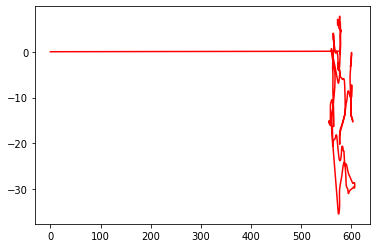

IndexError: index 713 is out of bounds for axis 0 with size 713

In [4]:
# Optimize the pose graph. This involves adjusting the vertices so that...
# the set of edges between the adjusted vertices zhatij = (estimated true translation_ij, estimated true theta_ij) 
# and the set of actual measured edges zij = (scan-matched translation_ij, scan-matched theta_ij)
# are optimally close, as measured by nonlinear least squares.

%matplotlib inline

from scipy.sparse.linalg import spsolve
from scipy import array, linalg, dot
from enum import Enum
import copy
import matplotlib.pyplot as plt
import pylab

pylab.plot(vertices[:, 1], vertices[:, 2], 'r')
plt.pause(1)

x = vertices[:, 1:]

num_vertices = vertices.shape[0]
dimensions = 3
num_states = dimensions*num_vertices

def normalize_all_nodes_angles(theta, num_vertices):
    for i in range(0, num_vertices):
        while theta[i] < -math.pi:
            theta += 2*math.pi
        while theta[i] >= math.pi:
            theta -= 2*math.pi
    return theta

it = 0
max_iter = 750
err = np.inf
tolerance = 1.0e-11
ti = np.zeros([2, 1])
tj = np.zeros([2, 1])
tij = np.zeros([2, 1])
Rij = np.zeros([2, 2])
Ri = np.zeros([2, 2])
Rj = np.zeros([2, 2])
dRi_by_dthetai = np.zeros([2, 2])
Ωij = np.zeros([3, 3])
while err > tolerance:
    # num_states = 3 * num_vertices (since x,y,theta)
    H = np.zeros([num_states, num_states])
    b = np.zeros([num_states, 1])
    for edge in edges:
        i = int(edge[0])
        j = int(edge[1])
        tij[0] = edge[2]
        tij[1] = edge[3]
        thetaij = edge[4]
        Ωij[0, 0] = edge[5]
        Ωij[0, 1] = edge[6]
        Ωij[0, 2] = edge[7]
        Ωij[1, 0] = edge[6]
        Ωij[1, 1] = edge[8]
        Ωij[1, 2] = edge[9]
        Ωij[2, 0] = edge[7]
        Ωij[2, 1] = edge[9]
        Ωij[2, 2] = edge[10]
        # Initial values
        ti[0] = x[i, 0]
        ti[1] = x[i, 1]
        tj[0] = x[j, 0]
        tj[1] = x[j, 1]
        thetai = x[i, 2]
        thetaj = x[j, 2]
        # Rotation matrix from node i to node j
        Rij[0, 0] = np.cos(thetaij)
        Rij[0, 1] = -np.sin(thetaij)
        Rij[1, 0] = np.sin(thetaij)
        Rij[1, 1] = np.cos(thetaij)
        # Node i rotation matrix
        Ri[0, 0] = np.cos(thetai)
        Ri[0, 1] = -np.sin(thetai)
        Ri[1, 0] = np.sin(thetai)
        Ri[1, 1] = np.cos(thetai)
        # Node j rotation matrix
        Rj[0, 0] = np.cos(thetaj)
        Rj[0, 1] = -np.sin(thetaj)
        Rj[1, 0] = np.sin(thetaj)
        Rj[1, 1] = np.cos(thetaj)
        # dRi / dthetai
        dRi_by_dthetai[0, 0] = -np.sin(thetai)
        dRi_by_dthetai[0, 1] = -np.cos(thetai)
        dRi_by_dthetai[1, 0] = np.cos(thetai)
        dRi_by_dthetai[1, 1] = -np.sin(thetai)
        # Aij
        Aij = np.zeros([3, 3])
        Aij[0:2, 0:2] = -np.dot(Rij.T, Ri.T)
        Aij[0:2, 2] = np.dot(np.dot(Rij.T, dRi_by_dthetai.T), tj - ti).reshape(2)
        Aij[2, 2] = -1.0
        # Bij
        Bij = np.zeros([3, 3])
        Bij[0:2, 0:2] = np.dot(Rij.T, Ri.T)
        Bij[2, 2] = 1.0
        # eij
        eij = np.zeros([3, 1])
        eij[0:2, 0] = np.dot(Rij.T, np.dot(Ri.T, (tj - ti)) - tij).reshape(2)
        eij[2, 0] = thetaj - thetai - thetaij
        
        istart = 3*i
        iend = 3*i+3
        jstart = 3*j
        jend = 3*j+3

        b[istart:iend] += np.dot(Aij.T, np.dot(Ωij, eij)).reshape(3, 1)
        b[jstart:jend] += np.dot(Bij.T, np.dot(Ωij, eij)).reshape(3, 1)

        H[istart:iend, istart:iend] += np.dot(Aij.T, np.dot(Ωij, Aij))
        H[istart:iend, jstart:jend] += np.dot(Aij.T, np.dot(Ωij, Bij))
        H[jstart:jend, istart:iend] += np.dot(Bij.T, np.dot(Ωij, Aij))
        H[jstart:jend, jstart:jend] += np.dot(Bij.T, np.dot(Ωij, Bij))
    
    H[0:3, 0:3] += np.eye(3, 3)
    deltax = spsolve(H, -b)
    deltax = deltax.reshape(num_vertices, dimensions)
    x += deltax
    # x = np.add(x, deltax, out=x, casting="unsafe")
    err = np.linalg.norm(deltax, 2)
    it += 1
    if it > max_iter:
        raise Exception("The optimization didn't converge")
        break
    print(it, "error: ", err)

x[:, 2] = normalize_all_nodes_angles(x[:, 2], num_vertices)
x_opt = x

pylab.plot(x_opt[:,0], x_opt[:,1], 'r')
plt.pause(5)

# TODO: Plot the corrected path the robot takes and use something like PyRoboViz to show the walls.